In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from reframed import load_cbmodel

## pFBA simulations

In [38]:
df = pd.read_csv('../results/pfba_single.tsv', sep='\t', na_values='None')

In [39]:
models = {x: load_cbmodel(f'../models/{x}.xml.gz', flavor='bigg') for x in set(df['model'])}
lp_sizes = {x: len(models[x].reactions) for x in models}
df['size_lp'] = df['model'].apply(lambda x: lp_sizes[x])

In [4]:
solver_name = {
    'CPLEX_PY': 'cplex',
    'GUROBI': 'gurobi',
    'SCIP_CMD': 'scip',
    'HiGHS_CMD': 'highs',
    'GLPK_CMD': 'glpk',
    'COIN_CMD': 'coin',

}
df['solver'] = df['interface'].apply(lambda x: solver_name[x])

In [21]:
df2 = pd.read_csv('../results/pfba_communities.tsv', sep='\t', na_values='None')
df2['solver'] = df2['interface'].apply(lambda x: solver_name[x])

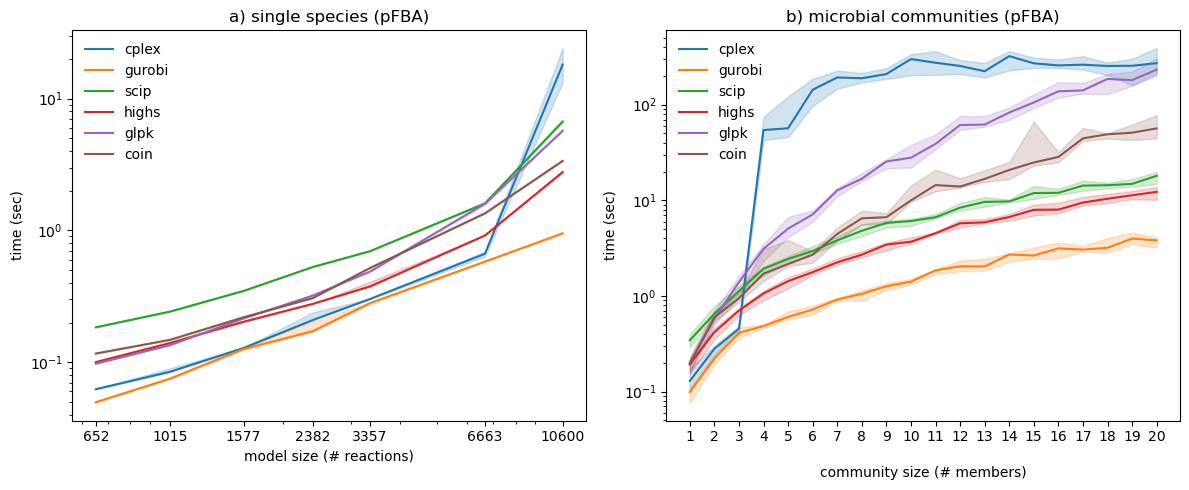

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=df, x="size_lp", y="time", hue="solver",  ax=ax1, estimator="median", errorbar=("pi", 50))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks(list(lp_sizes.values()))
ax1.set_xticklabels(list(lp_sizes.values()))
ax1.set_xlabel('model size (# reactions)')
ax1.set_ylabel('time (sec)')
ax1.legend(loc=2, frameon=False)
ax1.set_title('a) single species (pFBA)')

sns.lineplot(data=df2, x="size", y="time", hue="solver", ax=ax2, estimator="median", errorbar=("pi", 50))

ax2.set_yscale('log')
ax2.set_xticks(range(1,21))
ax2.set_xlabel('\ncommunity size (# members)')
ax2.set_ylabel('time (sec)')
ax2.legend(loc=2, frameon=False)
ax2.set_title('b) microbial communities (pFBA)')

f.tight_layout()
f.savefig('../figures/pfba.tiff', dpi=300)

## Memory tests - communities

In [65]:
df3 = pd.read_csv('../results/memory_test_2.tsv', sep='\t')

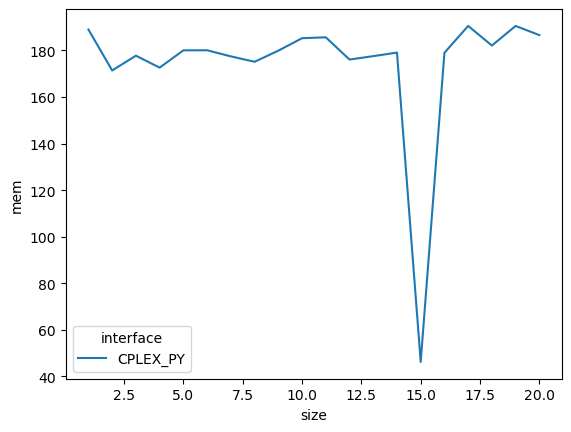

In [66]:
ax = sns.lineplot(data=df3,  x="size", y="mem",  hue="interface",  estimator="median", errorbar=("pi", 50))
#grid.set(ylim=(0, 400))

## Memory tests - MILP

In [67]:
df4 = pd.read_csv('../results/memory_test_milp.tsv', sep='\t')

In [68]:
milp_sizes = {x: len(models[x].get_exchange_reactions()) for x in models}
df4['size_milp'] = df4['model'].apply(lambda x: milp_sizes[x])

Text(0, 0.5, 'memory (MB)')

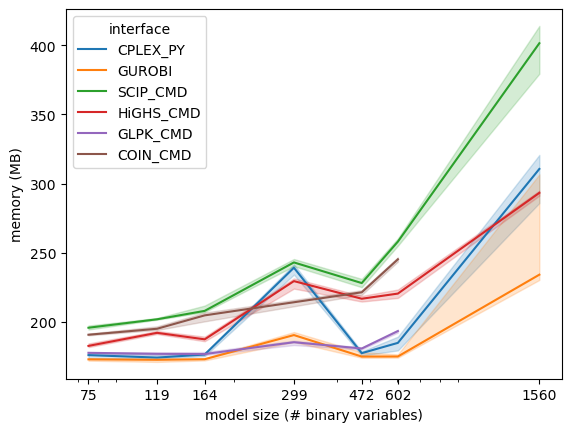

In [69]:
ax = sns.lineplot(data=df4, x="size_milp", y="mem", hue="interface", estimator="median", errorbar=("pi", 50))
ax.set_xscale('log')
ax.set_xticks(list(milp_sizes.values()))
ax.set_xticklabels(list(milp_sizes.values()))
ax.set_xlabel('model size (# binary variables)')
ax.set_ylabel('memory (MB)')

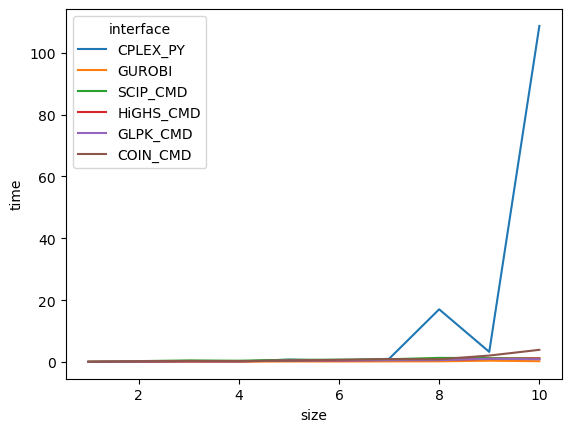

In [70]:
df5 = pd.read_csv('../results/community_simulation_2.tsv', sep='\t')
ax = sns.lineplot(data=df5, x="size", y="time", hue="interface", estimator="median", errorbar=("pi", 50))